# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*



```
`# This is formatted as code`
```

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Eunice | Nwaobi | EN | 11h24m | 25% |
| Member 2: | Albert | Fudzi  | AF        | 11h24m | 25% |
| Member 3: | Ama | Yiadom-Boakye| AYB | 11h24m | 25% |
| Member 4: | Ahsan | Farid | AF | 11h24m | 25% |


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

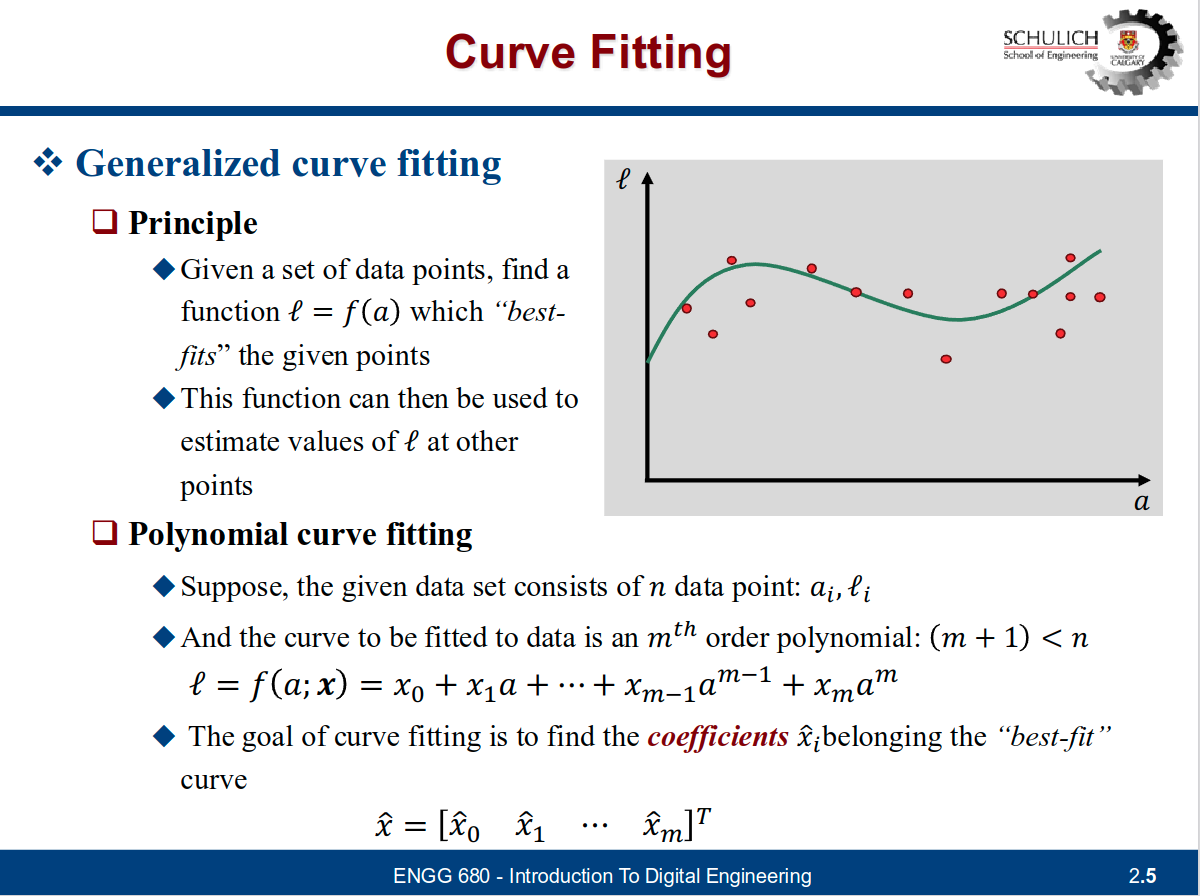

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [185]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [186]:
prefix = "/content/drive/MyDrive/ENGG680_LAB_ASSIGNMENTS/Lab_Assignment2/"

In [187]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel(prefix + "data.xlsx")
arr_data = df_data.to_numpy() # converting pandas dataframe to numpy

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
columns = list(df_data.columns)
i_l = columns.index("l")
i_l_var = columns.index("l_var")
i_l_true = columns.index("l_true")
l = arr_data[:, i_l] # slicing l column (0)
l_var = arr_data[:, i_l_var] # slicing l_var column (1)
l_true = arr_data[:, i_l_true] # slicing l_true column (2)

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
# step 3
# define the number of observation n
# (1 mark)
n = arr_data.shape[0] # get the shape to find number of observations

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n) # get the identity matrix - !!!!**CHECK IN CLASS**!!!!!

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


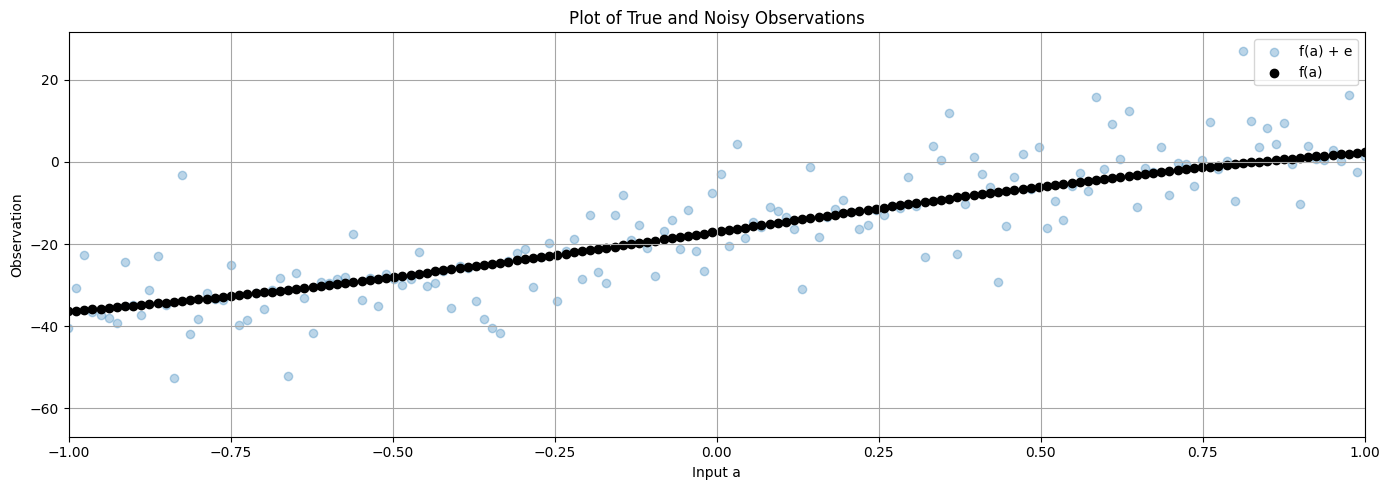

In [190]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, c="tab:blue", marker="o", alpha=0.3, label="f(a) + e") # l is observations with noise
ax.scatter(a, l_true, c="k", label="f(a)") # true observation - no noise
ax.set_xlim([-1, 1])
plt.xlabel("Input a")
plt.ylabel("Observation")
plt.title("Plot of True and Noisy Observations")
plt.legend(mode="best")

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [191]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
  '''
  Args:
      a:              function input (constants)
      l:              noisy observations
      P:              observation weight matrix
      deg:            degree of polynomial to fit to data
  Returns:
      x:              estimated polynomial coefficients
      cov_x:          uncertainty in estimated coefficients
      apv:            a posterier variance factor (goodness of fit)
      v:              observation residuals
  '''
  A = np.array([[element**m for m in range(deg+1)] for element in list(a)])
  x = np.linalg.inv(A.T @ P @ A) @ A.T @ P @ l
  v = l - (A @ x)
  n = A.shape[0]
  m = deg
  # added to avoid divide by zeros where n=m
  if m==n: epsilon = 3e-7 # SHOULD WE ADD ASK TAs
  else: epsilon = 0
  apv = v.T@P@v/(n-(m+1)+epsilon)
  cov_x = apv * np.linalg.inv(A.T @ P @ A)
  return (x, cov_x, apv, v)

In [192]:
# # test case
# a = np.array([12,11,10,9,8])
# l = np.array([[4], [3], [2], [0], [1]])
# x, cox_x, apv, v = fit_polynomial_curve(a=a, l=l, P=P, deg=1)
# print(x, cox_x, apv, v)

In [193]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
x1, cox_x1, apv1, v1 = fit_polynomial_curve(a=a, l=l, P=P, deg=1)
x3, cox_x3, apv3, v3 = fit_polynomial_curve(a=a, l=l, P=P, deg=3)
x5, cox_x5, apv5, v5 = fit_polynomial_curve(a=a, l=l, P=P, deg=5)
print(x1, x3, x5)

[-16.59352348   7.25633807] [-16.72496774  19.63961372   0.03979476  -2.08281013] [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]


In [194]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x1[::-1], a) # reverse our coefficients to follow order of function
cubic_uw = np.polyval(x3[::-1], a) # reverse our coefficients to follow order of function
quintic_uw = np.polyval(x5[::-1], a) # reverse our coefficients to follow order of function

#line_uw, cubic_uw, quintic_uw #, np.polyval(fit_polynomial_curve(a=a, l=l, P=P, deg=100)[0][::-1], a[-1])

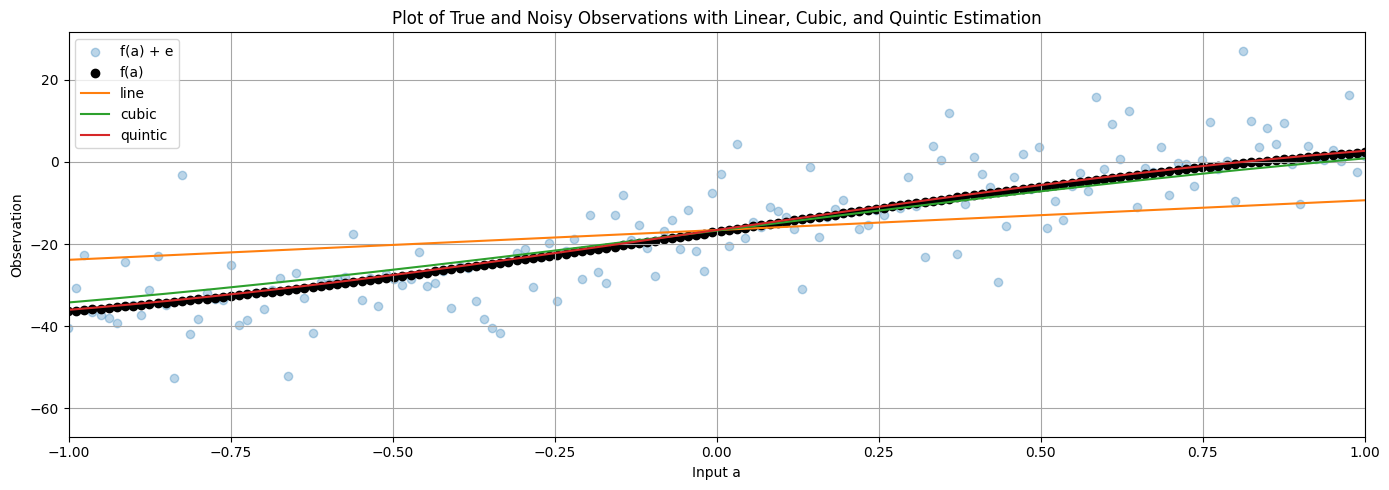

In [195]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, c="tab:blue", marker="o", alpha=0.3, label="f(a) + e") # l is observations with noise
ax.scatter(a, l_true, c="k", label="f(a)") # true observation - no noise

ax.plot(a, line_uw, c="tab:orange", label="line")
ax.plot(a, cubic_uw, c="tab:green", label="cubic")
ax.plot(a, quintic_uw, c="tab:red", label="quintic")

ax.set_xlim([-1, 1])
plt.xlabel("Input a")
plt.ylabel("Observation")
plt.title("Plot of True and Noisy Observations with Linear, Cubic, and Quintic Estimation")
plt.legend(mode="best")

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [196]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print(f"A posterier variance for line: {apv1}, cubic: {apv3}, quintic:{apv5}.")
# ask TAs or prof if this changes with weighted because that would mean we either need a new function or a kwarg

A posterier variance for line: 162.742608604322, cubic: 66.13227783131883, quintic:63.75834463018419.


In [197]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
l2_norm1 = np.sum(v1**2)
l2_norm3 = np.sum(v3**2)
l2_norm5 = np.sum(v5**2)

print(f"L2-norm of residuals of line: {l2_norm1}, cubic: {l2_norm3}, quintic: {l2_norm5}.")

L2-norm of residuals of line: 81045.81908495237, cubic: 32801.60980433414, quintic: 31496.62224731099.


In [198]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
print("The residuals are high because of the model we are using. The apv is the goodness of fit measure and as the a posterier variance factor reduces, so does the residuals which means we have a more accurate model.")


The residuals are high because of the model we are using. The apv is the goodness of fit measure and as the a posterier variance factor reduces, so does the residuals which means we have a more accurate model.


In [199]:
P

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [200]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
np.fill_diagonal(P, l_var**(-1))

[-16.54496159   7.67854617] [-16.77797524  20.33157168  -0.03430166  -2.23356908] [-1.67951025e+01  2.26801815e+01 -7.07246017e-02 -3.49795817e+00
  8.12376456e-03  1.22547782e-01]
A posterier variance for line: 12.054651233436902, cubic: 1.1444647026537131, quintic:0.9447009043856548.
Weighted minimization: 6003.216314251577, cubic: 567.6544925162417, quintic: 466.68224676651346.


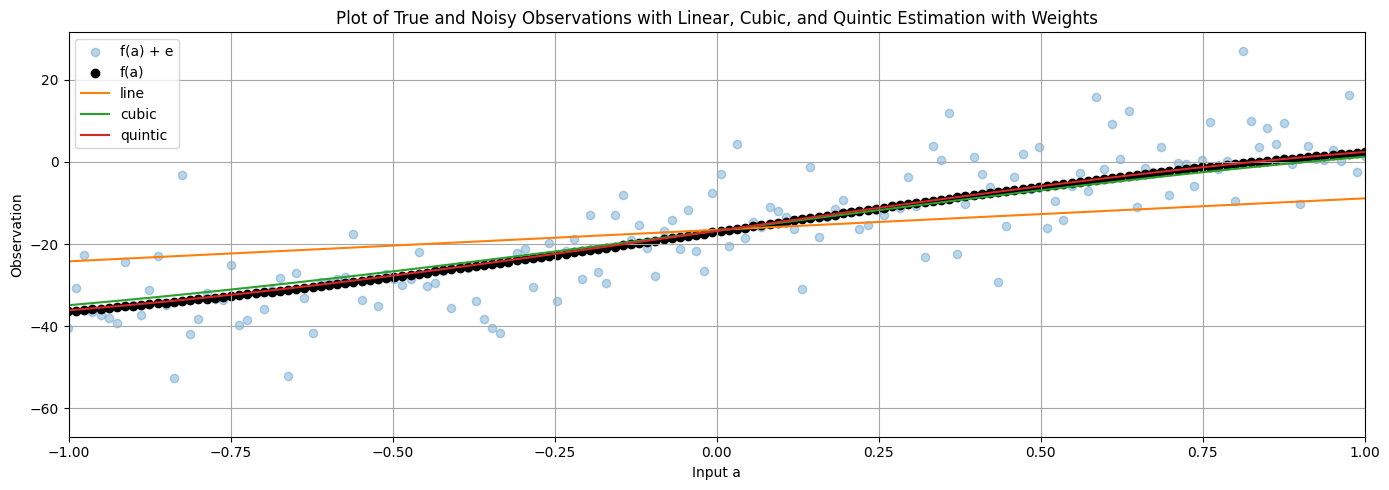

In [201]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# Repeat step 6
x1_13, cox_x1_13, apv1_13, v1_13 = fit_polynomial_curve(a=a, l=l, P=P, deg=1)
x3_13, cox_x3_13, apv3_13, v3_13 = fit_polynomial_curve(a=a, l=l, P=P, deg=3)
x5_13, cox_x5_13, apv5_13, v5_13 = fit_polynomial_curve(a=a, l=l, P=P, deg=5)
print(x1_13, x3_13, x5_13)

# Repeat step 7
line_uw_13 = np.polyval(x1_13[::-1], a) # reverse our coefficients to follow order of function
cubic_uw_13 = np.polyval(x3_13[::-1], a) # reverse our coefficients to follow order of function
quintic_uw_13 = np.polyval(x5_13[::-1], a) # reverse our coefficients to follow order of function

# Repeat step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, c="tab:blue", marker="o", alpha=0.3, label="f(a) + e") # l is observations with noise
ax.scatter(a, l_true, c="k", label="f(a)") # true observation - no noise

ax.plot(a, line_uw_13, c="tab:orange", label="line")
ax.plot(a, cubic_uw_13, c="tab:green", label="cubic")
ax.plot(a, quintic_uw_13, c="tab:red", label="quintic")

ax.set_xlim([-1, 1])
plt.xlabel("Input a")
plt.ylabel("Observation")
plt.title("Plot of True and Noisy Observations with Linear, Cubic, and Quintic Estimation with Weights")
plt.legend(mode="best")

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# Repeat step 9
print(f"A posterier variance for line: {apv1_13}, cubic: {apv3_13}, quintic:{apv5_13}.")
# ask TAs or prof if this changes with weighted because that would mean we either need a new function or a kwarg

# Repeat step 10 using v^T P v = phi
phi1 = v1_13.T @ P @ v1_13
phi3 = v3_13.T @ P @ v3_13
phi5 = v5_13.T @ P @ v5_13

print(f"Weighted minimization: {phi1}, cubic: {phi3}, quintic: {phi5}.")

In [202]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

print(f"Unweighted: A posterier variance for line: {apv1}, cubic: {apv3}, quintic:{apv5}.")
print(f"Unweighted: L2-norm of residuals of line: {l2_norm1}, cubic: {l2_norm3}, quintic: {l2_norm5}.")
print(f"Weighted: A posterier variance for line: {apv1_13}, cubic: {apv3_13}, quintic:{apv5_13}.")
print(f"Weighted: Weighted minimization: {phi1}, cubic: {phi3}, quintic: {phi5}.")

print("\nWe observe that our a posterier variance factors have reduced significantly and the errors have also come down drastically.")

Unweighted: A posterier variance for line: 162.742608604322, cubic: 66.13227783131883, quintic:63.75834463018419.
Unweighted: L2-norm of residuals of line: 81045.81908495237, cubic: 32801.60980433414, quintic: 31496.62224731099.
Weighted: A posterier variance for line: 12.054651233436902, cubic: 1.1444647026537131, quintic:0.9447009043856548.
Weighted: Weighted minimization: 6003.216314251577, cubic: 567.6544925162417, quintic: 466.68224676651346.

We observe that our a posterier variance factors have reduced significantly and the errors have also come down drastically.


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

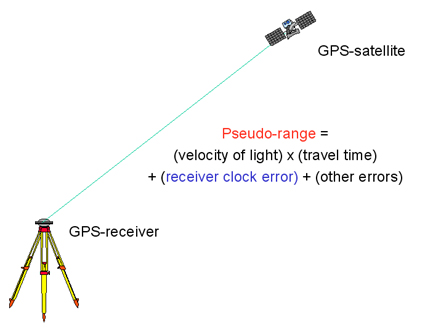

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [203]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel(f"{prefix}pseudoranges.xlsx")
df_sat_pos = pd.read_excel(f"{prefix}satellite_position.xlsx")

pseudorange = df_pseudorange.to_numpy() # conversion to numpy
sat_pos = df_sat_pos.to_numpy() # conversion to numpy

In [204]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [205]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)/m**2 # weight matrix

In [206]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros((m, 1)) # zero initial states

In [207]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

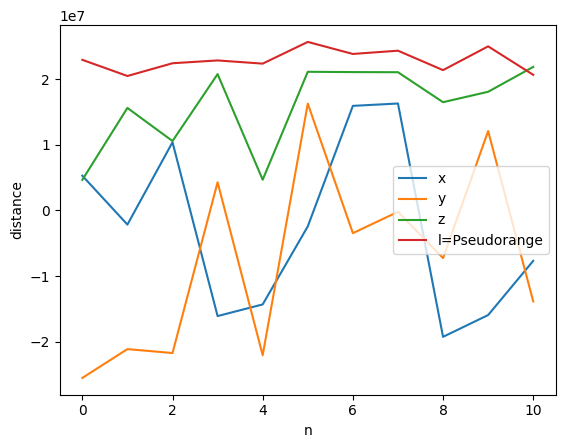

In [208]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones((m, 1)) # corrections array
i = 0 # iteration loop counter i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
the_A = [] # added list of A
the_apv = 0.0 # added apv
receiver_pos = np.tile(GroundTruth, (n,1))
satellite_pos = sat_pos[:, 1:]
l = pseudorange[:, 1:]
# initially we made a sensible guess by plotting
plt.plot(satellite_pos[:, 0], label="x")
plt.plot(satellite_pos[:, 1], label="y")
plt.plot(satellite_pos[:, 2], label="z")
plt.plot(l, label="l=Pseudorange")
plt.xlabel("n")
plt.ylabel("distance")
plt.legend()

#our guess according to the method in class
x_0 = np.array([1, -1000003.50, -900000.07, 4000000.90]).reshape(m, 1) #-900000.20, -1000000.07, 4000000.90
x_hat = x_0.copy()

In [209]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  # compute distance using euclidean norm
  diff = satellite_pos - receiver_pos
  diff_sq = diff ** 2
  diff_sq_sum = np.sum(diff_sq, axis=1)
  distance = np.sqrt(diff_sq_sum)
  return distance


In [210]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  # assume r_pos = x_0 and rho = a
  A = []
  temp = []
  n = rho.shape[0]
  epsilon = 3e-7
  col1 = np.array([1]*n) # we compute the ones column for the design matrix
  col2 = np.exp((-(s_pos[:,0]-r_pos[2,0])**2)/(2*r_pos[3,0]**2+epsilon)) # we compute our second column
  col3 = np.multiply((r_pos[1,0]*(s_pos[:,1]-r_pos[2,0])/(r_pos[3,0]**2+epsilon)), np.exp((-(s_pos[:,1]-r_pos[2,0])**2)/(2*r_pos[3,0]**2+epsilon)) ) # we compute our third column
  col4 = np.multiply((r_pos[1,0]*(s_pos[:,2]-r_pos[2,0])**2/(r_pos[3,0]**3+epsilon)), np.exp((-(s_pos[:,2]-r_pos[2,0])**2)/(2*r_pos[3,0]**2+epsilon)) ) # we compute our fourth column

  A = np.zeros((n, m)) # we assemble our matrix
  A[:, 0] = col1
  A[:, 1] = col2
  A[:, 2] = col3
  A[:, 3] = col4

  return A

In [211]:
#REPLICATING THE NOTES
trya = np.array([1.1, 1.0, 5.0, 1.5]).reshape(-1, 1)
tryrho =np.array([1, 2, 3, 4,5, 6, 7, 8, 9, 10]).reshape(-1, 1)
trys = np.array([[1, 2, 3, 4,5, 6, 7, 8, 9, 10], [1, 2, 3, 4,5, 6, 7, 8, 9, 10], [1, 2, 3, 4,5, 6, 7, 8, 9, 10]])
design_matrix(trya, trys.T, tryrho)

array([[ 1.        ,  0.02856551, -0.05078312,  0.13542165],
       [ 1.        ,  0.1353353 , -0.18044704,  0.3608941 ],
       [ 1.        ,  0.41111231, -0.36543312,  0.48724418],
       [ 1.        ,  0.80073741, -0.35588325,  0.23725551],
       [ 1.        ,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.80073741,  0.35588325,  0.23725551],
       [ 1.        ,  0.41111231,  0.36543312,  0.48724418],
       [ 1.        ,  0.1353353 ,  0.18044704,  0.3608941 ],
       [ 1.        ,  0.02856551,  0.05078312,  0.13542165],
       [ 1.        ,  0.00386592,  0.00859094,  0.02863645]])

In [212]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

while(np.all(delta < 0.001) == False): # convergence criteria
  # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
  # (1 marks)
  print(delta[1:] < 0.001)
  rho = euclidean_norm(receiver_pos, satellite_pos)#...

  # compute the design matrix A
  # (1 marks)
  A = design_matrix(x_hat, satellite_pos, rho) #...
  # else: A = design_matrix(x_hat, satellite_pos, rho)

  # compute the misclosure array w
  # (1 marks)
  w = l - A @ delta

  # compute the corrections delta
  # (1 marks)
  delta = np.linalg.inv(A.T @ P @ A) @ A.T @ P @ w

  # update the states
  # (1 marks)
  x_hat += delta
  print(delta)
  x_0 = x_hat

  # compute the position error from using the updated states against groundtruth
  # (1 marks)
  d = GroundTruth - x_hat[1:].reshape(-1,)
  err_pos = (d.T @ d)/np.sqrt(np.sum(np.dot(d, d)))

  # update the counter i, (i.e., increament of 1 for each iteration)
  # (1 mark)
  i += 1


  # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
  # (1 marks)
  arr_w.append(w)
  arr_delta.append(delta)
  arr_err_pos.append(err_pos)
  arr_i.append(i)
  the_A = A # change design matrix for problem below
  v = w - A @ delta
  the_apv =  v.T@P@v/(n-m)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
print()
apv = arr_err_pos[-1]
# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = the_apv * np.linalg.inv(the_A.T @ P @ the_A)

[[False]
 [False]
 [False]]
[[23039559.40503238]
 [ -269817.57177357]
 [-2559008.22210274]
 [ 2312136.35660396]]
[[ True]
 [ True]
 [False]]
[[    69486.75508316]
 [   -75269.28423558]
 [-10685094.98025528]
 [  1132384.83767308]]
[[ True]
 [ True]
 [False]]
[[ 23135842.33242762]
 [  -669333.59753037]
 [  3547634.14739796]
 [-11132225.18721129]]
[[ True]
 [False]
 [ True]]
[[   113994.24049484]
 [ -1073381.49890776]
 [ -3780136.23877232]
 [-42174148.12190112]]
[[ True]
 [ True]
 [ True]]
[[ 3.53118853e+07]
 [-8.61404488e+06]
 [-1.21039343e+08]
 [-1.48359209e+08]]
[[ True]
 [ True]
 [ True]]
[[-7.06349249e+06]
 [-1.58831192e+07]
 [-1.16059171e+09]
 [-8.38998852e+08]]



In [213]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print(f"\nPrint:\n      Estimated states:{x_0},\n\n       Corrections Array:{arr_delta[-1]},\n\n       Estimated measurements residuals:{arr_w[-1]},\n\n       A posteriori Variance of Unit Weight:{the_apv},\n\n       Covariance matrix of estimated states:{C_x_hat},\n\n       Number of iterations:{arr_i[-1]},\n\n       3-D position errors:{arr_err_pos},\n\nafter the LSE convergence to the console.\n")


Print:
      Estimated states:[[ 7.46072765e+07]
 [-2.75849695e+07]
 [-1.29600766e+09]
 [-1.03321991e+09]],

       Corrections Array:[[-7.06349249e+06]
 [-1.58831192e+07]
 [-1.16059171e+09]
 [-8.38998852e+08]],

       Estimated measurements residuals:[[-5698179.21560967]
 [-7659602.53831598]
 [-6202465.74515627]
 [-5217739.22921853]
 [-5882555.11133825]
 [-2854133.36307609]
 [-4877952.88245453]
 [-4441832.31182517]
 [-6599252.62490479]
 [-3277474.63902107]
 [-7264326.8818724 ]],

       A posteriori Variance of Unit Weight:[[7.36790389e+09]],

       Covariance matrix of estimated states:[[ 9.10586584e+12 -7.32597506e+12 -1.79931658e+13 -1.43361633e+14]
 [-7.32597506e+12  9.62976043e+12  8.32584290e+13  8.70620635e+13]
 [-1.79931658e+13  8.32584290e+13  7.82105766e+15  7.41871987e+15]
 [-1.43361633e+14  8.70620635e+13  7.41871987e+15  1.14771027e+16]],

       Number of iterations:6,

       3-D position errors:[1420570.3525301493, 10788210.890629672, 11091831.797367742, 51954178.01

In [214]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
print(f"The high a posteriori variance {the_apv} is a strong indication that the errors are high and our model needs significant work.")

The high a posteriori variance [[7.36790389e+09]] is a strong indication that the errors are high and our model needs significant work.


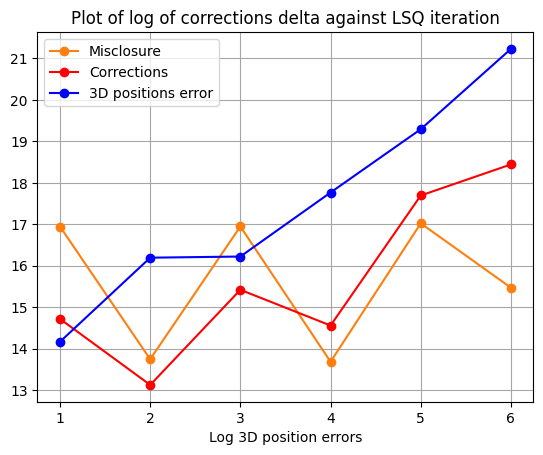

In [215]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.


# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
log_misclosure = np.log(np.abs(arr_w)) # as misclosure is also the residual we took the absolute value for this assessment
plt.plot(arr_i, np.mean(log_misclosure,axis=1).reshape(-1,), c="tab:orange", label="Misclosure", marker="o")
plt.xlabel("Log misclosure")
plt.title("Plot of log of misclosure against LSQ iteration")
plt.legend(mode="best")
# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)

log_delta = np.log(np.abs(arr_delta))
plt.plot(arr_i, np.mean(log_delta,axis=1).reshape(-1,), c="red", label="Corrections", marker="o")
plt.xlabel("Log corrections")
plt.title("Plot of log of corrections delta against LSQ iteration")
plt.legend(mode="best")

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

log_err_pos = np.log(np.abs(arr_err_pos))
plt.plot(arr_i, log_err_pos, c="blue", label="3D positions error", marker="o")
plt.xlabel("Log 3D position errors")
plt.title("Plot of log of corrections delta against LSQ iteration")
plt.legend(mode="best")
plt.grid(True, which='both',ls='-',color='0.65')


In [216]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
print("The rise in our 3D positions error while the misclosure (although struggling)\ndecreases may suggest that the our model is gradually optimizing.\nHowever, we only had a few iterations before convergence.")

The rise in our 3D positions error while the misclosure (although struggling)
decreases may suggest that the our model is gradually optimizing.
However, we only had a few iterations before convergence.


In [217]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!